# Setup

In [1]:
%matplotlib inline

import numpy as np, pandas as pd
import matplotlib.pyplot as plt 
from pathlib import Path
import seaborn as sns 
import sklearn
from sklearn import datasets

pd.options.mode.chained_assignment = None

In [2]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
if 'google.colab' in str(get_ipython()):
    print('The notebook is running on Colab. colab=True.')
    colab=True
else:
    print('The notebook is not running on Colab. colab=False.')
    colab=False

The notebook is not running on Colab. colab=False.


# Data

In [3]:
NB_DIR = Path.cwd()
DATA = NB_DIR/'data'
DATA.mkdir(exist_ok=True)

Vi bruker et datasett med huspriser fra California:

In [4]:
if colab:
    df = pd.read_csv('https://www.dropbox.com/s/quug4svzdyj5k4j/housing_data.csv?dl=1')

In [5]:
if not colab:
    df = pd.read_csv(DATA/'housing_data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


Vi ser at features i datasettet er på ganske ulike skalaer:

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


Vi ser fra `df.info()` over at alle features utenom `ocean_proximity` er numeriske.

In [10]:
df.ocean_proximity.value_counts()

<1H OCEAN     7346
INLAND        5214
NEAR OCEAN    2112
NEAR BAY      1835
ISLAND           5
Name: ocean_proximity, dtype: int64

Vi dropper `ocean_proximity` her for å forenkle historien (det er uansett ikke aktuelt å skalere ikke-numeriske features).

In [11]:
df.drop('ocean_proximity', axis=1, inplace=True)

Historien vi skal fortelle om dette har behov for at vi er i en maskinlærings-situasjon med X, y og trenings- og test-data:

In [12]:
X, y = df.drop('median_house_value', axis=1), df.median_house_value

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Imputer

Vi ser at det er noen manglende verdier i `total_bedrooms`. Vi imputerer:

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
features = ['total_bedrooms']
imp = SimpleImputer()

In [17]:
X_train.loc[:, features] = imp.fit_transform(X_train[features])
X_test.loc[:, features] = imp.transform(X_test[features])

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12384 entries, 4418 to 5765
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12384 non-null  float64
 1   latitude            12384 non-null  float64
 2   housing_median_age  12384 non-null  float64
 3   total_rooms         12384 non-null  float64
 4   total_bedrooms      12384 non-null  float64
 5   population          12384 non-null  float64
 6   households          12384 non-null  float64
 7   median_income       12384 non-null  float64
dtypes: float64(8)
memory usage: 870.8 KB


In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 14319 to 14233
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
dtypes: float64(8)
memory usage: 290.2 KB


# Skaler features

Vi kan plotte features mot hverandre for å se effekten av deres ulike skalaer:

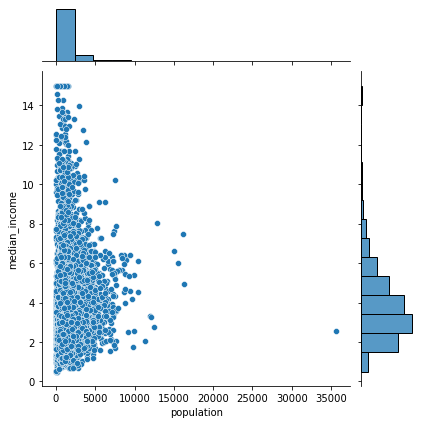

In [20]:
sns.jointplot(data=X_train, x="population", y="median_income", marginal_kws=dict(bins=15))
plt.show()

Hvis vi bruker samme verdier på aksene blir dette enda klarere:

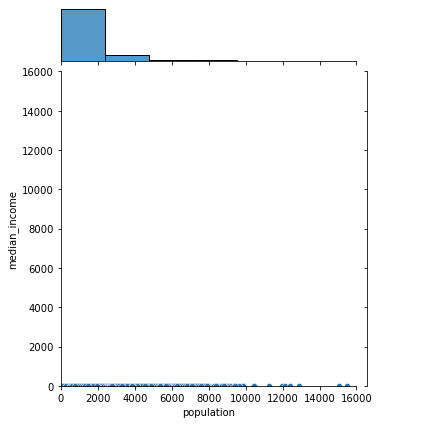

In [21]:
axes_lim = (0,16000)
sns.jointplot(data=X_train, x="population", y="median_income", xlim=axes_lim, ylim=axes_lim, marginal_kws=dict(bins=15))
plt.show()

Vi kan skalere features ved hjelp av scikit-learn:

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [23]:
?StandardScaler

In [24]:
?MinMaxScaler

In [25]:
std = StandardScaler()
mms = MinMaxScaler()

In [26]:
X_train_std = std.fit_transform(X_train)
X_train_std = pd.DataFrame(data=X_train_std, columns=X_train.columns)
X_test_std = std.transform(X_test)

X_train_mms = mms.fit_transform(X_train)
X_train_mms = pd.DataFrame(data=X_train_mms, columns=X_train.columns)
X_test_std = mms.transform(X_test)

In [27]:
X_train_std.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.238400e+04,1.238400e+04,1.238400e+04,1.238400e+04,1.238400e+04,1.238400e+04,1.238400e+04,1.238400e+04
mean,-8.803072e-16,-8.337307e-16,1.152896e-17,-9.456260e-17,-1.544397e-16,2.892102e-17,1.034110e-17,1.048813e-16
std,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00
min,-2.383999e+00,-1.448741e+00,-2.195380e+00,-1.197720e+00,-1.274977e+00,-1.253723e+00,-1.304017e+00,-1.752349e+00
25%,-1.110715e+00,-7.989278e-01,-8.460296e-01,-5.421224e-01,-5.746207e-01,-5.641069e-01,-5.764115e-01,-6.843114e-01
50%,5.370646e-01,-6.446557e-01,2.707956e-02,-2.323196e-01,-2.375001e-01,-2.303082e-01,-2.361644e-01,-1.831088e-01
75%,7.817348e-01,9.728637e-01,6.620681e-01,2.265757e-01,2.491880e-01,2.681882e-01,2.643915e-01,4.544998e-01
max,2.629245e+00,2.950351e+00,1.852672e+00,1.671344e+01,1.346574e+01,3.017004e+01,1.271678e+01,5.776827e+00


In [28]:
X_train_mms.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000
mean,0.475540,0.329327,0.542330,0.066870,0.086494,0.039897,0.093006,0.232741
std,0.199480,0.227329,0.247042,0.055833,0.067842,0.031824,0.071325,0.132822
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036603,0.047512,0.021946,0.051895,0.141853
50%,0.582669,0.182784,0.549020,0.053899,0.070382,0.032568,0.076162,0.208421
75%,0.631474,0.550478,0.705882,0.079520,0.103398,0.048432,0.111863,0.293106
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


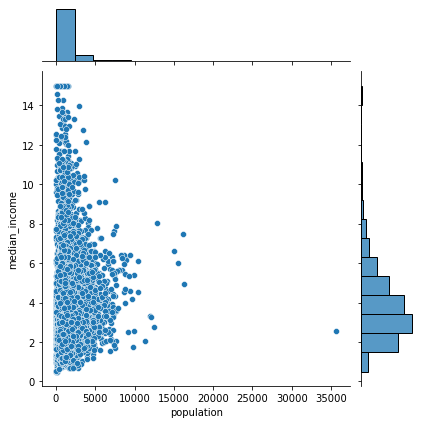

In [29]:
sns.jointplot(data=X_train, x="population", y="median_income", marginal_kws=dict(bins=15))
plt.show()

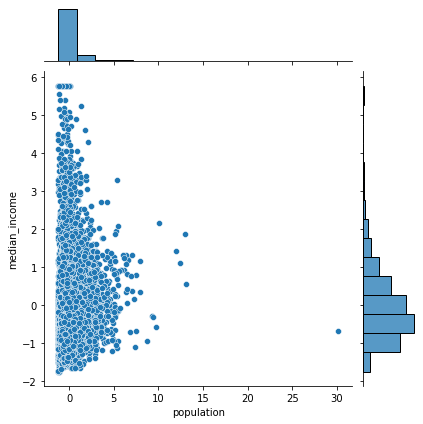

In [30]:
sns.jointplot(data=X_train_std, x="population", y="median_income", marginal_kws=dict(bins=15))
plt.show()

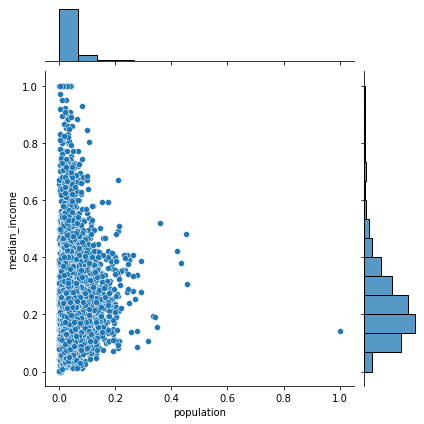

In [31]:
sns.jointplot(data=X_train_mms, x="population", y="median_income", marginal_kws=dict(bins=15))
plt.show()

**Flere eksempler:**

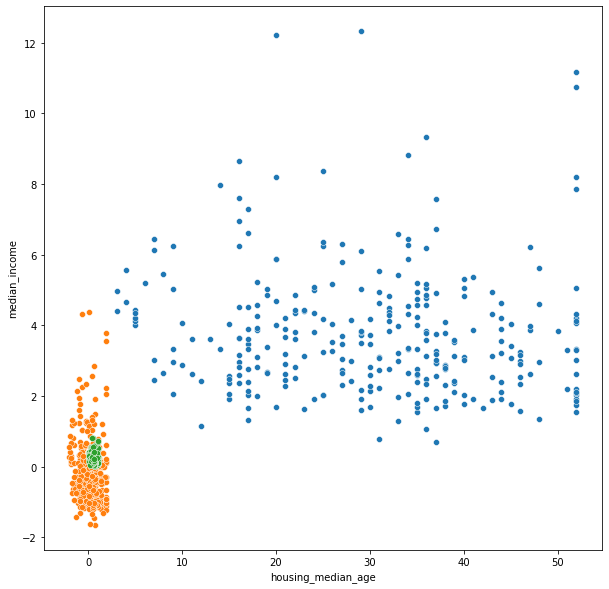

In [32]:
f, ax = plt.subplots(figsize=(10,10))
nb_points = 300

sns.scatterplot(data=X_train[:nb_points], x="housing_median_age", y="median_income", ax=ax)
sns.scatterplot(data=X_train_std[:nb_points], x="housing_median_age", y="median_income", ax=ax)
sns.scatterplot(data=X_train_mms[:nb_points], x="housing_median_age", y="median_income", ax=ax)
plt.show()

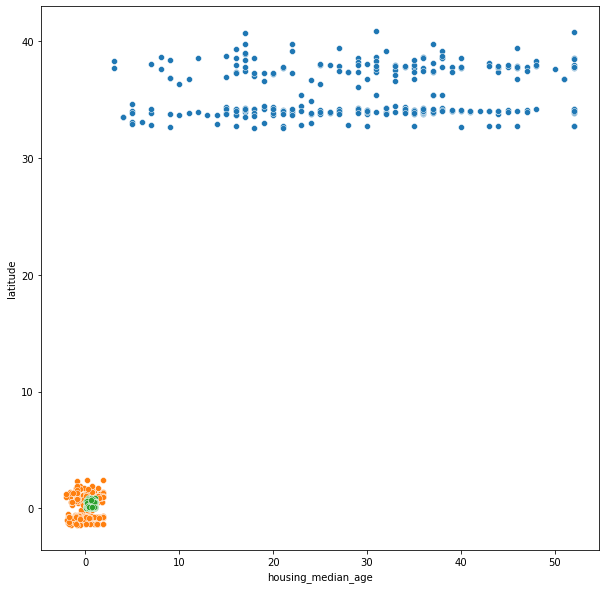

In [33]:
f, ax = plt.subplots(figsize=(10,10))
nb_points = 300

sns.scatterplot(data=X_train[:nb_points], x="housing_median_age", y="latitude", ax=ax)
sns.scatterplot(data=X_train_std[:nb_points], x="housing_median_age", y="latitude", ax=ax)
sns.scatterplot(data=X_train_mms[:nb_points], x="housing_median_age", y="latitude", ax=ax)
plt.show()

> Hvilken skalering (om noen) det er naturlig å bruke avhenger av modellen og egenskaper i datasettet (tre-baserte modeller som random forest behøver for eksempel ingen skalering). 

> I praksis kan en gjerne forsøke flere typer (og bruke ytelsen på valideringssettet til å velge skalerings-strategi). 